In [1]:
import requests
import matplotlib.pyplot as plt

# Replace 'YOUR_API_TOKEN' with your actual API token
headers = {'X-Auth-Token': '8856b530942c43ea8ba2dcc1d43380a4'}

In [2]:
response3 = requests.get(
        f'https://api.football-data.org/v4/competitions/PD/standings',
        headers=headers
    )
data3 = response3.json()
data3

{'filters': {'season': '2023'},
 'area': {'id': 2224,
  'name': 'Spain',
  'code': 'ESP',
  'flag': 'https://crests.football-data.org/760.svg'},
 'competition': {'id': 2014,
  'name': 'Primera Division',
  'code': 'PD',
  'type': 'LEAGUE',
  'emblem': 'https://crests.football-data.org/PD.png'},
 'season': {'id': 1577,
  'startDate': '2023-08-13',
  'endDate': '2024-05-26',
  'currentMatchday': 15,
  'winner': None},
 'standings': [{'stage': 'REGULAR_SEASON',
   'type': 'TOTAL',
   'group': None,
   'table': [{'position': 1,
     'team': {'id': 86,
      'name': 'Real Madrid CF',
      'shortName': 'Real Madrid',
      'tla': 'RMA',
      'crest': 'https://crests.football-data.org/86.png'},
     'playedGames': 15,
     'form': None,
     'won': 12,
     'draw': 2,
     'lost': 1,
     'points': 38,
     'goalsFor': 33,
     'goalsAgainst': 9,
     'goalDifference': 24},
    {'position': 2,
     'team': {'id': 298,
      'name': 'Girona FC',
      'shortName': 'Girona',
      'tla': 'GIR

# TEAM POSITION CHART

In [3]:
matchday_list = ['2023-08-15', '2023-08-22', '2023-08-29', '2023-09-04',
                '2023-09-19', '2023-09-25', '2023-09-29', '2023-10-03',
                '2023-10-09', '2023-10-24', '2023-10-31', '2023-11-07']

team_short_names = ['Real Madrid', 'Atleti', 'Girona', 'Barça', 
                   'Athletic', 'Valencia', 'Osasuna', 'Rayo Vallecano', 
                   'Real Betis', 'Mallorca', 'Getafe', 'Real Sociedad', 
                   'Villareal', 'Alavés', 'Granada', 'Las Palmas', 
                   'Celta', 'Almería', 'Sevilla FC', 'Cádiz CF']

team_colors = {
    'Real Madrid': '#fcbf00',
    'Atleti': '#262f61',
    'Girona': '#cd2534',
    'Barça': '#a50044',
    'Athletic': '#ee2523',
    'Valencia': '#ee3524',
    'Osasuna': '#0a346f',
    'Rayo Vallecano': '#e53027',
    'Real Betis': '#00954c',
    'Cádiz CF': '#fde607',
    'Getafe': '#004fa3',
    'Real Sociedad': '#143c8b',
    'Villareal': '#005187',
    'Alavés': '#004fa3',
    'Granada': '#e60d2e',
    'Las Palmas': '#004b9d',
    'Celta': '#e5254e',
    'Almería': '#ee1119',
    'Sevilla FC': '#d70f21',
    'Mallorca': '#ed1b24',
   
}

In [4]:
teams_positions = {}
for md in range(0,8):
    response = requests.get(
        f'https://api.football-data.org/v4/competitions/PD/standings?date='+matchday_list[md],
        headers=headers
    )
    data2 = response.json()
    
    
    for team in data2['standings'][0]['table'] :
        sn = team['team']['shortName']
        tp = team['position']
        if sn not in teams_positions:
            teams_positions[sn] = []
        teams_positions[sn].append(tp)

### Static

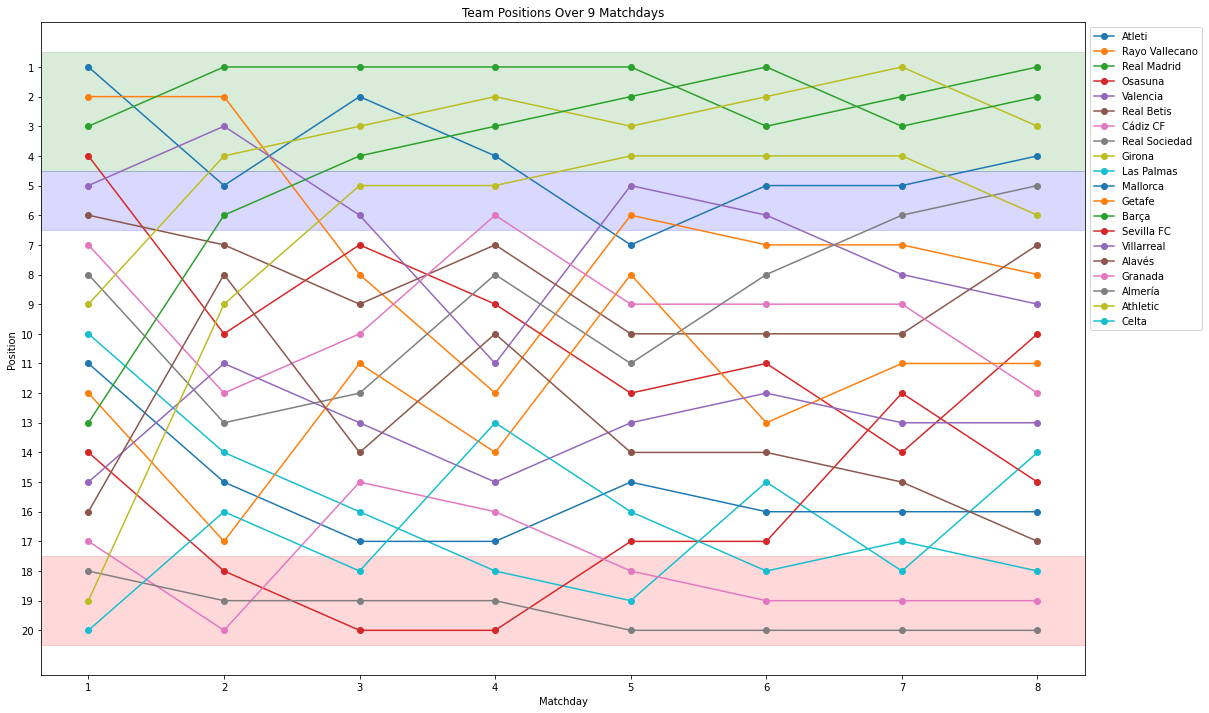

In [5]:
import matplotlib.pyplot as plt

# Your teams_positions dictionary must be defined before this snippet.

# Set up the plot
fig, ax = plt.subplots(figsize=(20, 12))

# Number of matchdays
matchdays = list(range(1, 9))

# Plotting each team's positions across matchdays
for team, positions in teams_positions.items():
    ax.plot(matchdays, positions, marker='o', label=team)

# Adding titles and labels
ax.set_title('Team Positions Over 9 Matchdays')
ax.set_xlabel('Matchday')
ax.set_ylabel('Position')

# Set the y-axis to show integers from 1 to 20
ax.set_yticks(range(1, 21))

# Set the x-axis to show integers from 1 to 9
ax.set_xticks(range(1, 9))

# Invert the y-axis because in league standings, 1st place is the top position
ax.invert_yaxis()

# Adding a legend outside of the plot on the right side
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Highlight y-values from 1 to 4 with a green background
ax.axhspan(0.5, 4.5, color='green', alpha=0.15)
ax.axhspan(4.5, 6.5, color='blue', alpha=0.15)
ax.axhspan(17.5, 20.5, color='red', alpha=0.15)

# Adjust the subplot params so the plot fits into the figure area.
plt.subplots_adjust(right=0.85)

# Show grid
#ax.grid(True)

# Display the plot
plt.show()


### Dynamic

In [11]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Assume teams_positions is already defined

# Create subplots
fig = make_subplots(rows=1, cols=1)
val = 0
# Plotting each team's positions across matchdays
for team, positions in teams_positions.items():
    
    # You can add more details within the hover text such as the team's name and matchday.
    hover_text = [f"{team}<br>Matchday {matchday}<br>Date: {matchday_list[-4]}<br>Position: {position}" for matchday, position in zip(matchdays, positions)]
    fig.add_trace(
        go.Scatter(
            x=matchdays,
            y=positions,
            mode='lines+markers',
            name=team,
            text=hover_text,  # This is where you set the hover text
            hoverinfo='text', 
            line=dict(color=team_colors.get(team, '#000')),  # Use the team's color, default to black if not found
            marker=dict(color=team_colors.get(team, '#000')), # Display the text on hover
            visible='legendonly'
        )
    )
    if val == len(matchday_list) - 1:
        val =-1 
    val += 1

# Highlighting y-values from 1 to 4 with a green background
fig.add_hrect(y0=0.5, y1=4.5, line_width=0, fillcolor="green", opacity=0.15)
fig.add_hrect(y0=4.5, y1=6.5, line_width=0, fillcolor="blue", opacity=0.15)
fig.add_hrect(y0=17.5, y1=20.5, line_width=0, fillcolor="red", opacity=0.15)




# Update y-axis
fig.update_yaxes(autorange="reversed", tickmode='array', tickvals=list(range(1, 21)), title='Position')

# Update x-axis
fig.update_xaxes(tickmode='array', tickvals=list(range(1, 9)), title='Matchday')

# Update layout
fig.update_layout(
    title={
        'text': "Team Positions Over Matchdays (2023)",
        'y':0.9,
        'x':0.47,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    legend=dict(x=1.05, y=1, title='Clubs'),
    hovermode="closest"
)

# Update the size of the figure (optional)
fig.update_layout(width=1000, height=600)

# Show figure
fig.show()


# TEAM POINTS CHART

In [12]:
teams_points = {}
for md in range(0,8):
    response = requests.get(
        f'https://api.football-data.org/v4/competitions/PD/standings?date='+matchday_list[md],
        headers=headers
    )
    data2 = response.json()
    
    
    for team in data2['standings'][0]['table'] :
        sn = team['team']['shortName']
        tp = team['points']
        if sn not in teams_points:
            teams_points[sn] = []
        teams_points[sn].append(tp)

In [13]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Assume teams_points and team_colors are already defined
# team_colors should be a dictionary mapping team names to their color strings

# Create subplots
fig = make_subplots(rows=1, cols=1)

# Plotting each team's points across matchdays
for team, points in teams_points.items():
    val = 0
    # Ensure matchdays is defined, e.g., matchdays = range(1, len(points) + 1)
    hover_text = [f"{team}<br>Matchday {matchday}<br>Date: {matchday_list[-3]}<br>Points: {point}" for matchday, point in enumerate(points, start=1)]
    fig.add_trace(
        go.Scatter(
            x=list(range(1, len(points) + 1)),  # Assuming matchdays are a sequential list starting at 1
            y=points,
            mode='lines+markers',
            name=team,
            text=hover_text,  # This is where you set the hover text
            hoverinfo='text',
            line=dict(color=team_colors.get(team, '#000')),  # Use the team's color
            marker=dict(color=team_colors.get(team, '#000')),  # Set marker color
            visible='legendonly'  # Start with the trace not shown
        )
    
    )
    val += 1

# Update y-axis
fig.update_yaxes(title='Total Points')

# Update x-axis
# Assuming the number of matchdays is known, otherwise adjust accordingly
fig.update_xaxes(tickmode='array', tickvals=list(range(1, len(points) + 1)), title='Matchday')

# Update layout
fig.update_layout(
    title={
        'text': "Team Points Over Matchdays (2023)",
        'y':0.9,
        'x':0.5,  # Set to 0.5 to center the title
        'xanchor': 'center',
        'yanchor': 'top'
    },
    legend=dict(x=1.05, y=1, title='Clubs'),
    hovermode="closest"
)

# Update the size of the figure (optional)
fig.update_layout(width=1000, height=600)

# Show figure
fig.show()


In [8]:
teams_points

{'Atleti': [3, 4],
 'Rayo Vallecano': [3, 6],
 'Real Madrid': [3, 6],
 'Osasuna': [3, 3],
 'Valencia': [3, 6],
 'Real Betis': [3, 4],
 'Cádiz CF': [3, 3],
 'Real Sociedad': [1, 2],
 'Girona': [1, 4],
 'Las Palmas': [1, 1],
 'Mallorca': [1, 1],
 'Getafe': [1, 1],
 'Barça': [1, 4],
 'Sevilla FC': [0, 0],
 'Villarreal': [0, 3],
 'Alavés': [0, 3],
 'Granada': [0, 0],
 'Almería': [0, 0],
 'Athletic': [0, 3],
 'Celta': [0, 1]}

In [9]:
teams_positions

{'Atleti': [1, 5, 2, 4, 7, 5, 5, 4],
 'Rayo Vallecano': [2, 2, 8, 12, 6, 7, 7, 8],
 'Real Madrid': [3, 1, 1, 1, 1, 3, 2, 1],
 'Osasuna': [4, 10, 7, 9, 12, 11, 14, 10],
 'Valencia': [5, 3, 6, 11, 5, 6, 8, 9],
 'Real Betis': [6, 7, 9, 7, 10, 10, 10, 7],
 'Cádiz CF': [7, 12, 10, 6, 9, 9, 9, 12],
 'Real Sociedad': [8, 13, 12, 8, 11, 8, 6, 5],
 'Girona': [9, 4, 3, 2, 3, 2, 1, 3],
 'Las Palmas': [10, 14, 16, 18, 19, 15, 18, 14],
 'Mallorca': [11, 15, 17, 17, 15, 16, 16, 16],
 'Getafe': [12, 17, 11, 14, 8, 13, 11, 11],
 'Barça': [13, 6, 4, 3, 2, 1, 3, 2],
 'Sevilla FC': [14, 18, 20, 20, 17, 17, 12, 15],
 'Villarreal': [15, 11, 13, 15, 13, 12, 13, 13],
 'Alavés': [16, 8, 14, 10, 14, 14, 15, 17],
 'Granada': [17, 20, 15, 16, 18, 19, 19, 19],
 'Almería': [18, 19, 19, 19, 20, 20, 20, 20],
 'Athletic': [19, 9, 5, 5, 4, 4, 4, 6],
 'Celta': [20, 16, 18, 13, 16, 18, 17, 18]}

<hr>